# Spotify Playlist Analysis

### Challenge:

A music company is making a big push into playlists and wants to compete with the market-leading Billboard Hot 100 with it's new PopConnoisseur playlist.

I will evaluate 

a) whether Spotify's algorithmic data on Track Features aligns with my subjective categorization, and 

b) if that data can be used to evaluate whether the playlist has a good chance of capturing market share.

To do this I will compare songs from my PopConnoisseur Playlist compared with the Billboard Hot 100 and Ambient Relaxation playlists, using Spotify's own Track Features - danceability, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo - and Python Data Science packages Pandas, Seaborn, Numpy and Matplotlib.

Est time: 15min + questions

### Assumptions:
- An audience which is music- and data-literate.
    
### Applications:
- A&R tool to compare song features with playlist features for song pitching, either by automation or manually.

### Previously:
- used Spotipy to access Spotify's API and download a list of songs for the two playlists, then 2) their Track Features, which I saved to Excel files. 
- pc_data.xlsx is my PopConnoisseur Playlist
- bb_data.xlsx is the Billboard Hot 100.

In [1]:
# first we import our data analysis packages:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# then we load in the xlsx files as variables:
pcdf = pd.read_excel('pc_data.xlsx', usecols = "B:S")
bbdf = pd.read_excel('bb_data.xlsx', usecols = "B:S")

Let's look at the info for the PC playlist. We'll be working with the numerical ("float" and "int" type) columns.

In [3]:
pcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      362 non-null    float64
 1   energy            362 non-null    float64
 2   key               362 non-null    int64  
 3   loudness          362 non-null    float64
 4   mode              362 non-null    int64  
 5   speechiness       362 non-null    float64
 6   acousticness      362 non-null    float64
 7   instrumentalness  362 non-null    float64
 8   liveness          362 non-null    float64
 9   valence           362 non-null    float64
 10  tempo             362 non-null    float64
 11  type              362 non-null    object 
 12  id                362 non-null    object 
 13  uri               362 non-null    object 
 14  track_href        362 non-null    object 
 15  analysis_url      362 non-null    object 
 16  duration_ms       362 non-null    int64  
 1

In [4]:
# Let's look at the scale for these columns:
pcdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.462,0.715,11,-6.829,1,0.0454,0.11800,0.001030,0.0592,0.237,99.763,audio_features,6D4fpmCAzPMivhDQV1y2rH,spotify:track:6D4fpmCAzPMivhDQV1y2rH,https://api.spotify.com/v1/tracks/6D4fpmCAzPMi...,https://api.spotify.com/v1/audio-analysis/6D4f...,166788,4
1,0.678,0.607,0,-7.190,1,0.0750,0.17400,0.000000,0.0788,0.445,91.973,audio_features,0sZfuG1rArPovx9CdZ40vZ,spotify:track:0sZfuG1rArPovx9CdZ40vZ,https://api.spotify.com/v1/tracks/0sZfuG1rArPo...,https://api.spotify.com/v1/audio-analysis/0sZf...,204418,4
2,0.623,0.840,7,-3.944,0,0.0799,0.04730,0.023400,0.1070,0.788,162.062,audio_features,3zzW1STuSWbyEe76XgP6kp,spotify:track:3zzW1STuSWbyEe76XgP6kp,https://api.spotify.com/v1/tracks/3zzW1STuSWby...,https://api.spotify.com/v1/audio-analysis/3zzW...,251627,3
3,0.555,0.423,0,-6.232,1,0.0440,0.79900,0.000000,0.1120,0.257,137.044,audio_features,5ZT5UB1SNVMkfYiTvnliz4,spotify:track:5ZT5UB1SNVMkfYiTvnliz4,https://api.spotify.com/v1/tracks/5ZT5UB1SNVMk...,https://api.spotify.com/v1/audio-analysis/5ZT5...,202147,4
4,0.420,0.879,11,-4.916,0,0.0568,0.00729,0.000085,0.1800,0.432,128.913,audio_features,6Q7mhgiHSay1lwwfnKzgzh,spotify:track:6Q7mhgiHSay1lwwfnKzgzh,https://api.spotify.com/v1/tracks/6Q7mhgiHSay1...,https://api.spotify.com/v1/audio-analysis/6Q7m...,279000,4


We can see right off the bat that the scale for these columns is all over the place:

- "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness" and "valence" are all numerical (0-1).
- "mode" is either a minor (0) or major (1) key. 
- "key" represents what note the key is based around with 12 values (0-11).
- "loudness" is numerical, where the value given is the number of in decibels, or dB, below 0 (maximum volume). The closer to 0, the louder it is.
- "tempo" is numerical and indicates the pace of the song, in beats per minute.
- "time_signature" is the number of beats per musical bar, typically 3 or 4.

# Digging into the data.

Let's look at histograms of some of those columns, using Seaborn:

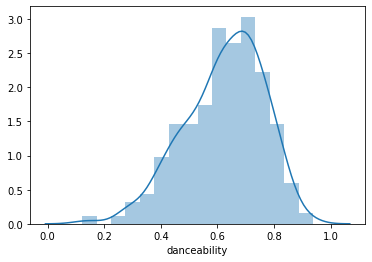

The mean is 0.6238563535911602
The median is 0.639


In [5]:
# print a histogram with Seaborn, showing the overall curve
sns.distplot(pcdf["danceability"])
plt.show()

# compute mean and median
dancemean = np.mean(pcdf["danceability"])
dancemedian = np.median(pcdf["danceability"])
print("The mean is", dancemean)
print("The median is", dancemedian)

The mean is 0.2043807794751381
The median is 0.1045


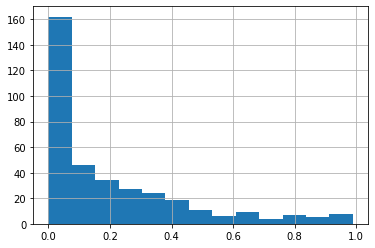

In [8]:
#print a histogram for "acousticness"
pcdf["acousticness"].hist(bins='fd')

# Calculate mean and median
acoustimean = np.mean(pcdf["acousticness"])
acoustimedian = np.median(pcdf["acousticness"])
print("The mean is", acoustimean)
print("The median is", acoustimedian)

The mean is 0.07181200817679559
The median is 3.86e-05


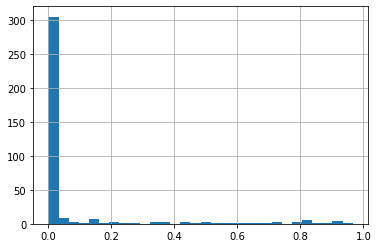

In [9]:
#print a histogram for "instrumentalness"
pcdf["instrumentalness"].hist(bins=30)

# Calculate mean and median
instimean = np.mean(pcdf["instrumentalness"])
instimedian = np.median(pcdf["instrumentalness"])
print("The mean is", instimean)
print("The median is", instimedian)

# Checking Data Quality.

In [11]:
pcdf.time_signature.value_counts()

4    339
3     14
5      7
1      2
Name: time_signature, dtype: int64

Pop songs in 5/4 time are rare so let's investigate by viewing those...

In [12]:
pcdf[pcdf.time_signature == 5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
18,0.586,0.6500,1,-5.912,1,0.3350,0.131000,0.000000,0.0738,0.7010,129.239,audio_features,7jhS5XE7nmgcsTbkcqzTc7,spotify:track:7jhS5XE7nmgcsTbkcqzTc7,https://api.spotify.com/v1/tracks/7jhS5XE7nmgc...,https://api.spotify.com/v1/audio-analysis/7jhS...,227173,5
22,0.294,0.0951,5,-12.915,1,0.0373,0.957000,0.000032,0.1040,0.1470,167.241,audio_features,5KmA68mgrZX815hICp1IVP,spotify:track:5KmA68mgrZX815hICp1IVP,https://api.spotify.com/v1/tracks/5KmA68mgrZX8...,https://api.spotify.com/v1/audio-analysis/5KmA...,192333,5
31,0.466,0.6660,1,-6.770,1,0.1690,0.000199,0.019500,0.0803,0.3370,113.935,audio_features,3LRddJIw2ymm1CHIO9xlkC,spotify:track:3LRddJIw2ymm1CHIO9xlkC,https://api.spotify.com/v1/tracks/3LRddJIw2ymm...,https://api.spotify.com/v1/audio-analysis/3LRd...,196117,5
35,0.344,0.4180,3,-7.811,1,0.0423,0.743000,0.000000,0.1020,0.0766,99.962,audio_features,4G9mDvbxpmMNFNXXlLbEot,spotify:track:4G9mDvbxpmMNFNXXlLbEot,https://api.spotify.com/v1/tracks/4G9mDvbxpmMN...,https://api.spotify.com/v1/audio-analysis/4G9m...,219893,5
43,0.482,0.4770,10,-8.444,0,0.0503,0.020100,0.000000,0.2510,0.3790,117.850,audio_features,0rlFL6bxIWcCn9gk9GExFA,spotify:track:0rlFL6bxIWcCn9gk9GExFA,https://api.spotify.com/v1/tracks/0rlFL6bxIWcC...,https://api.spotify.com/v1/audio-analysis/0rlF...,182834,5
247,0.122,0.5490,0,-7.389,1,0.0362,0.630000,0.015800,0.0908,0.2010,67.327,audio_features,4XmwxMblrHFWIXurJmFWD3,spotify:track:4XmwxMblrHFWIXurJmFWD3,https://api.spotify.com/v1/tracks/4XmwxMblrHFW...,https://api.spotify.com/v1/audio-analysis/4Xmw...,246787,5
315,0.544,0.9160,1,-2.742,1,0.2310,0.068700,0.000000,0.3520,0.4540,108.257,audio_features,2QZBf5Rq9bCHFt7j95G4w2,spotify:track:2QZBf5Rq9bCHFt7j95G4w2,https://api.spotify.com/v1/tracks/2QZBf5Rq9bCH...,https://api.spotify.com/v1/audio-analysis/2QZB...,212290,5


A quick listen shows all these are actually in 4/4 time so this is a case of incorrect metadata. Let's correct them:

In [13]:
pcdf.loc[pcdf.time_signature == 5,['time_signature']] = 4

## Conclusion about Spotify Data.

- The above data seems in accordance with what someone knowledgeable in music would conclude about the songs themselves
- Therefore: data quality = good

Let's drop the columns we don't need:

In [14]:
pcdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

In [15]:
pcdf.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,0.462,0.715,-6.829,0.0454,0.11800,0.0592,0.237,99.763,166788
1,0.678,0.607,-7.190,0.0750,0.17400,0.0788,0.445,91.973,204418
2,0.623,0.840,-3.944,0.0799,0.04730,0.1070,0.788,162.062,251627
3,0.555,0.423,-6.232,0.0440,0.79900,0.1120,0.257,137.044,202147
4,0.420,0.879,-4.916,0.0568,0.00729,0.1800,0.432,128.913,279000


Much cleaner.

# Checking correlation.

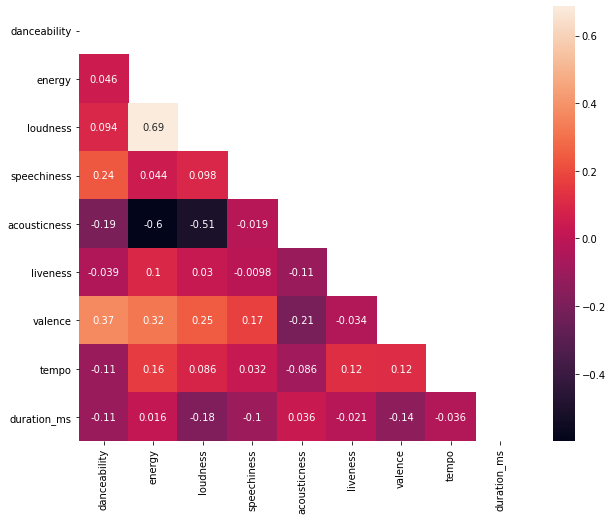

In [16]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(pcdf.corr()))
sns.heatmap(pcdf.corr(),annot=True, mask=mask)

We don't see any directly correlated columns, which indicates that collinearity isn't a problem.

# PopConnoisseur Observations

Some observations about the songs on the PopConnoisseur Playlist: 
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. mostly around the same length - 3-4 min
6. generally low-valence, which means "gloomy" or "negative"
7. some correlation between loudness and energy, which makes sense
8. negative correlation between acousticness and both energy and loudness, which again makes sense.

# Billboard Hot 100

Now let's look at the Billboard Hot 100. It's worth bearing in mind that the Billboard Hot 100 is just 100 songs vs 362 for PopConnoisseur.

The mean is 0.010118837900000002
The median is 0.0


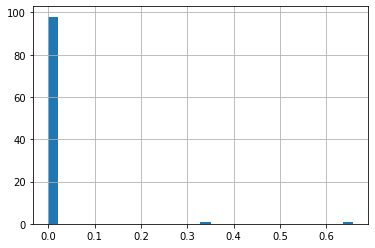

In [17]:
#print a histogram for "instrumentalness"
bbdf["instrumentalness"].hist(bins=30)

# Calculate mean and median
instimean = np.mean(bbdf["instrumentalness"])
instimedian = np.median(bbdf["instrumentalness"])
print("The mean is", instimean)
print("The median is", instimedian)

- virtually no instrumentally-leaning songs on the billboard Hot 100

In [18]:
bbdf.time_signature.value_counts()

4    97
3     2
1     1
Name: time_signature, dtype: int64

In [19]:
# Sure enough, if you check out the 1/4 song:
bbdf[bbdf.time_signature == 1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
42,0.778,0.559,6,-7.109,0,0.0776,0.128,0.0,0.399,0.678,129.989,audio_features,7aiClxsDWFRQ0Kzk5KI5ku,spotify:track:7aiClxsDWFRQ0Kzk5KI5ku,https://api.spotify.com/v1/tracks/7aiClxsDWFRQ...,https://api.spotify.com/v1/audio-analysis/7aiC...,185093,1


 - it's "Hot Girl Bummer", which is actually 4/4 time. We won't change it this time, since we'll be dropping that column. Otherwise the playlist is mostly 4/4 time, which sounds right for pop music. 

Let's drop the columns we don't need:

In [20]:
bbdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

Again, let's directly check correlations:

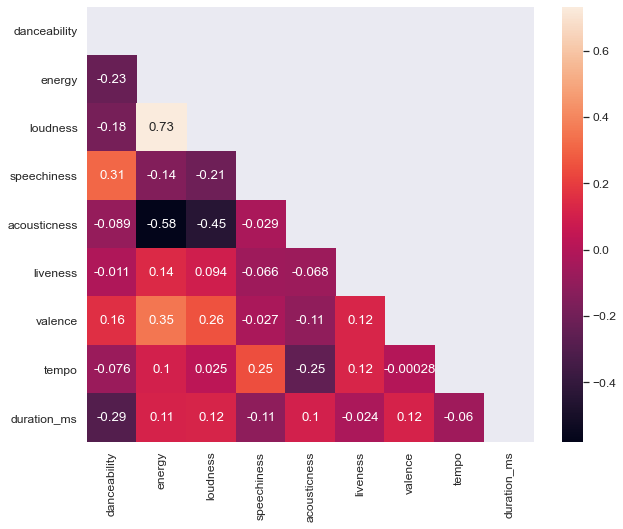

In [46]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.1)
mask = np.triu(np.ones_like(bbdf.corr()))
sns.heatmap(bbdf.corr(),annot=True, mask=mask)

# Billboard Observations

Some observations of songs on the Billboard Hot 100:
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. a wider variety of tempos than the PopConnoisseur playlist
6. valence mostly in the middle
7. again, some correlation between loudness and energy, which makes sense
8. negative correlation again between acousticness and both energy and loudness
9. no real correlation between energy and danceability, which is interesting...

# Comparing The Two Playlists

Let's check the average values for the two playlists:

In [22]:
#PopConnoisseur
pcdf.mean()

danceability         0.623856
energy               0.624329
loudness            -6.808097
speechiness          0.094267
acousticness         0.204381
liveness             0.160218
valence              0.437906
tempo              118.237229
duration_ms     222684.541436
dtype: float64

In [23]:
#Billboard
bbdf.mean()

danceability         0.727470
energy               0.620790
loudness            -6.537780
speechiness          0.128553
acousticness         0.193882
liveness             0.187433
valence              0.499516
tempo              120.670870
duration_ms     190449.530000
dtype: float64

Some observations:

1. Billboard Hot 100 (bbdf) is more danceable.
2. Energy, loudness, liveness, acousticness and tempo roughly comparable.
3. PopConnoisseur (pcdf) has longer songs.

Mostly, however, there is quite a lot of overlap in these data sets. Let's compare them directly, starting with Danceability:

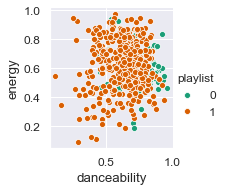

In [49]:
onedf = pd.read_excel('alldata.xlsx', usecols = "B,C,K")
sns.set(font_scale=1.1)
sns.pairplot(onedf, x_vars=["danceability"], y_vars=["energy"], hue = 'playlist', palette='Dark2')

As you can see, there is a lot of overlap. Let's compare everything:

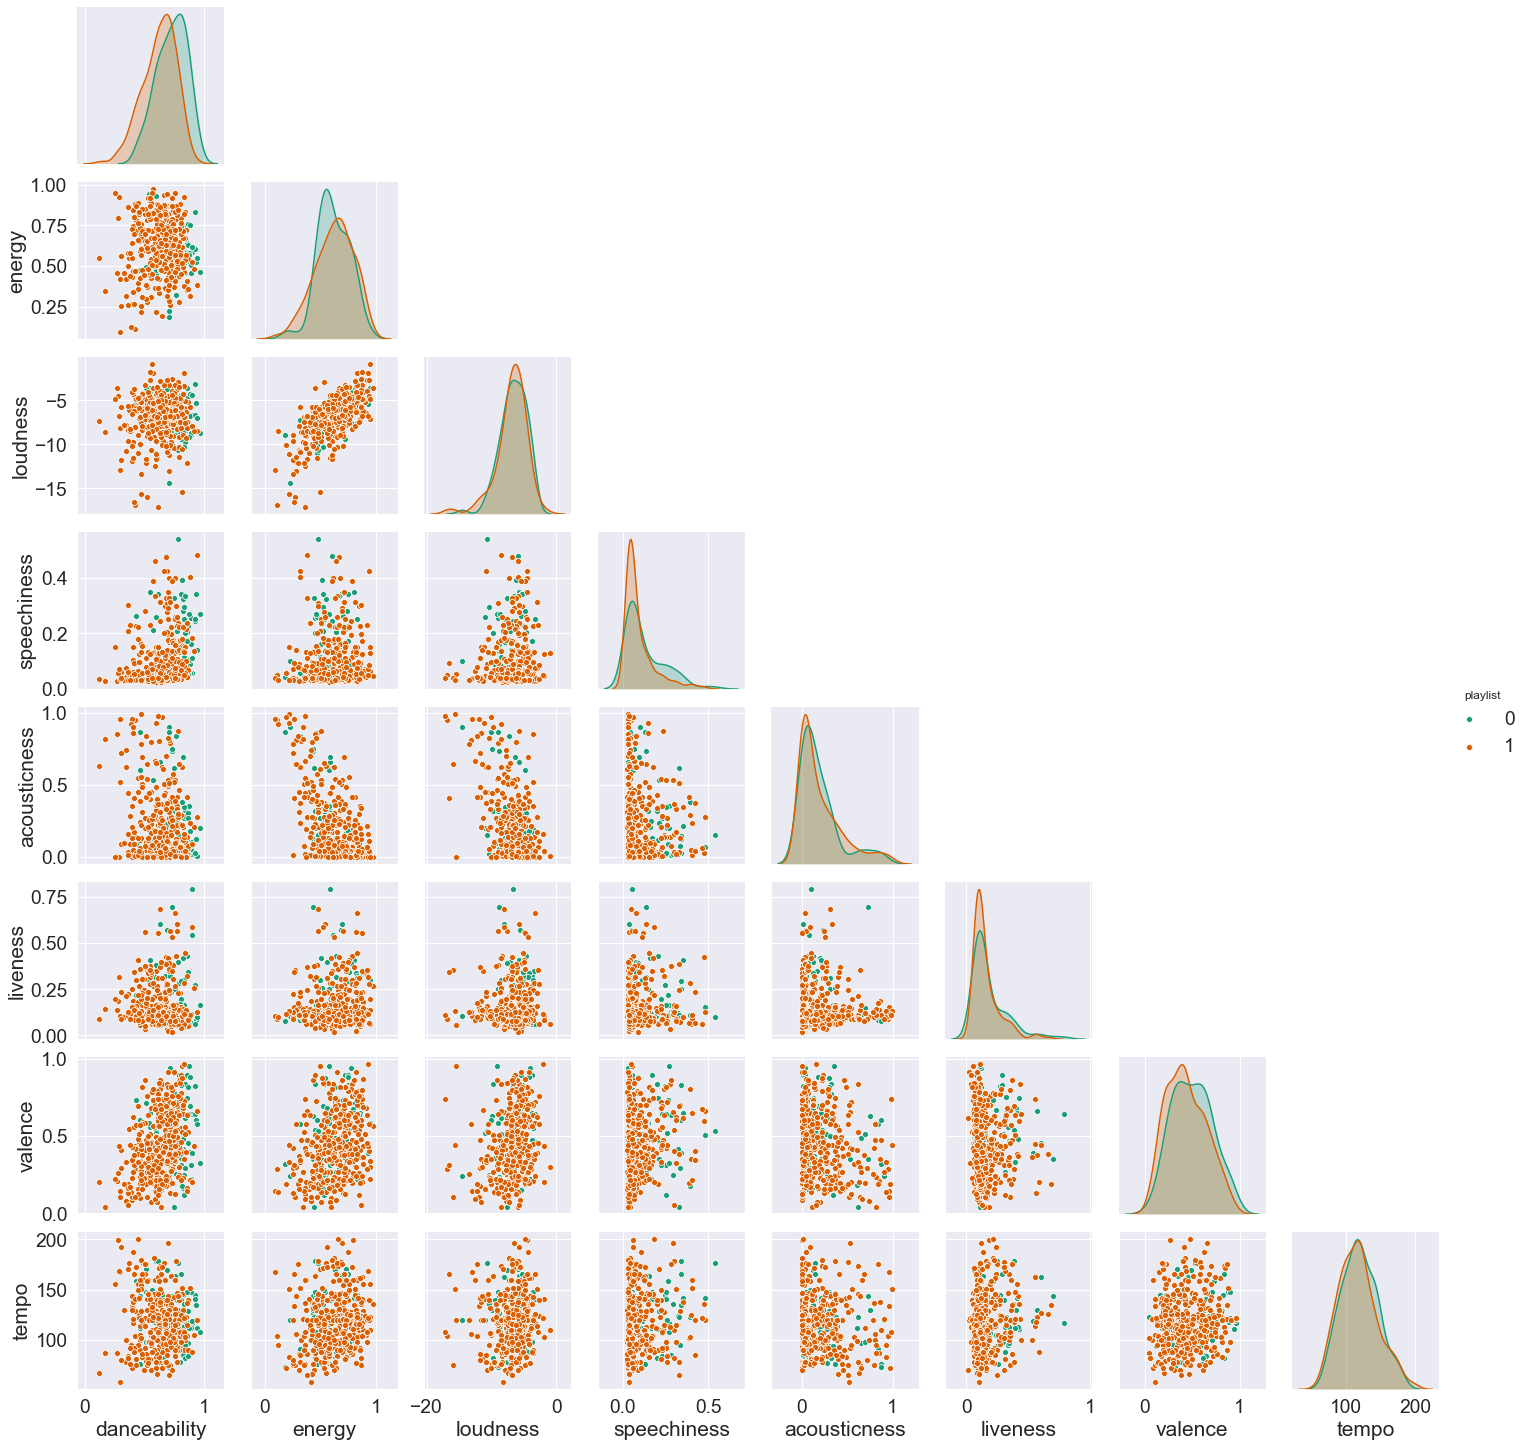

In [44]:
alldf = pd.read_excel('alldata.xlsx', usecols = "B:I,K")
sns.set(font_scale=1.75)
sns.pairplot(alldf, hue = 'playlist', palette='Dark2', corner=True)

# Adding A Third Playlist

Let's try adding in something less similar to really show the similarity between the two pop playlists: Spotify's Ambient Relaxation playlist. You can hear it here:

https://open.spotify.com/playlist/37i9dQZF1DX3Ogo9pFvBkY?si=33qUwYElThG7D5sk83CJlw

I grabbed the songs and features using Spotipy, saved it to 'ar_data.xlsx', loaded it as ardf, then dropped the extra columns. I then created a new column for merging the two Pop playlists with the Ambient Relaxation Playlist. Now let's merge the original two playlists with the new one:

In [42]:
ardf = pd.read_excel('ar_data.xlsx', usecols = "B:S")
ardf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','type','id','duration_ms'],axis=1,inplace=True)
ardf['playlist']=2
frames = [alldf, ardf]
alldf2 = pd.concat(frames)

Now if we run a pairplot separated by playlist:

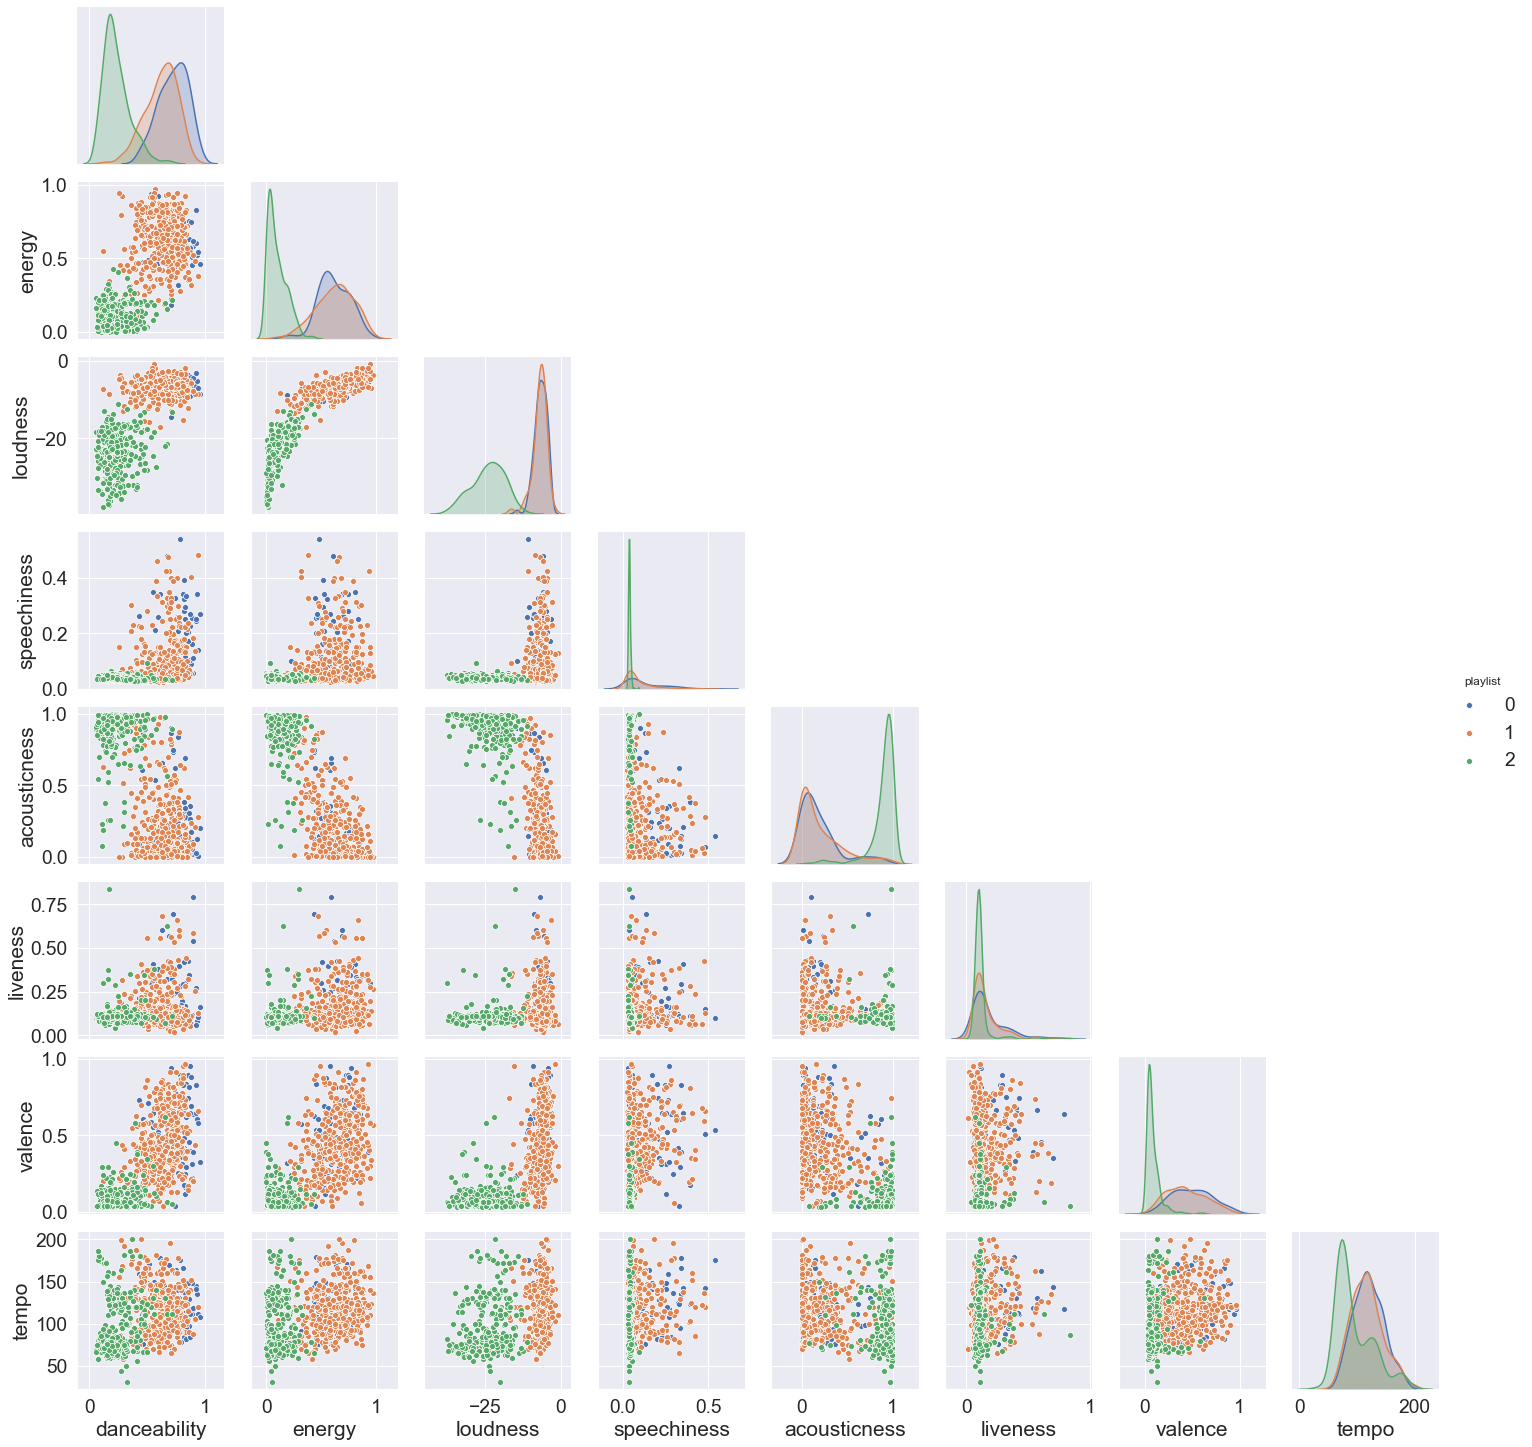

In [45]:
sns.set(font_scale=1.75)
sns.pairplot(alldf2, hue='playlist',corner=True)

Here we have a much more drastic difference! There is very clear separation in most features as the Ambient Relaxation playlist, in green.

# Conclusions:

I aimed to explore two questions:

a) whether Spotify's algorithmic data on Track Features aligns with my subjective categorization, and 

b) if that data can confirm that the company's playlist has a good chance of capturing market share.

Based on a comparison of Spotify's Track Features, I can confidently say that while not being perfect or free of data quality issues (i.e. time signatures), it does indeed align with my subjective evaluation of the songs in question.

Furthermore, using these Features, the PopConnoisseur playlist is indeed similar to the Billboard Hot 100 and can be confidently said to have a chance at capturing similar market share, all other things being equal.